In [23]:
#nhập luôn giá trị char_list = 140
import os
import json

current_directory_path = 'e:/Yumi/img_pro/vietnamese-handwriting-recognition-ocr-main'
TRAIN_JSON = os.path.join(str(current_directory_path), "labels.json")

# open these label jsons files
with open(TRAIN_JSON, 'r', encoding='utf8') as f:
    train_labels = json.load(f)
#find all characters in labels (so we don't blindly add chacters not even existed in our dataset)
char_list= set() # to random label's positions
for label in train_labels.values():
    char_list.update(set(label)) #add new characters
char_list=sorted(char_list) #sort tuple
len(char_list)

140

In [24]:
import os
import json

In [25]:

(min_height, max_height, min_width, max_width) = (94, 376, 955, 2694)

In [26]:
TIME_STEPS = 240
max_label_len = TIME_STEPS

In [27]:
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [28]:
# OUR FULL MODEL OF CRNN AND LSTM

# input with shape of height=32 and width=128 
inputs = Input(shape=(118,2167,1))
 
# Block 1
x = Conv2D(64, (3,3), padding='same')(inputs)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same')(x)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_3])
x = Activation('relu')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_5])
x = Activation('relu')(x)

# Block7
x = Conv2D(1024, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 1))(x)
x = Activation('relu')(x)

# pooling layer with kernel size (2,2) to make the height/2 #(1,9,512)
x = MaxPool2D(pool_size=(3, 1))(x)
 
# # to remove the first dimension of one: (1, 31, 512) to (31, 512) 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)
 
# # # bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

# # this is our softmax character proprobility with timesteps 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time

act_model = Model(inputs, outputs)

In [29]:
act_model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 118, 2167, 1 0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 118, 2167, 64 640         input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 39, 722, 64)  0           conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_21 (Activation)      (None, 39, 722, 64)  0           max_pooling2d_12[0][0]           
_______________________________________________________________________________________

In [30]:
act_model.load_weights(os.path.join('model_checkpoint_weights.hdf5'))

In [1]:
import cv2
import numpy as np

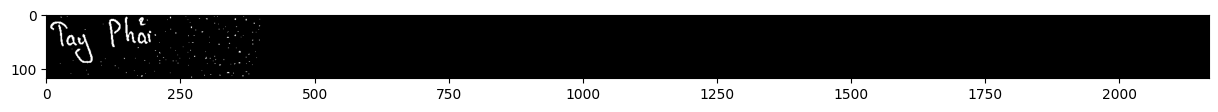

In [5]:
#lists for validation dataset
valid_img =[]
resize_max_width=0

i=0
path = 'E:\\Yumi\\Do_an_2\\data_7_12_light_6\\Image00008.JPG'
#path =  'E:\\Yumi\\img_pro\\vietnamese-handwriting-recognition-ocr-main\\data_expand\\0001_abc_08.jpg'
#path = "E:\\Yumi\\data_30_11\\Image00007.JPG"
# print(f_name)
# read input image and convert into gray scale image
img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
img = img[420:650,220:1000] #size anh 7_12

height, width = img.shape
# in this dataset, we don't need to do any resize at all here.
img = cv2.resize(img,(int(118/height*width),118))

height, width = img.shape
if img.shape[1] > resize_max_width:
    resize_max_width = img.shape[1]
    
img = np.pad(img, ((0,0),(0, 2167-width)), 'median')

# YOUR PART: Blur it
img = cv2.GaussianBlur(img, (5,5), 0)

# YOUR PART: Threshold the image using adapative threshold
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
#img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 4)

# add channel dimension
img = np.expand_dims(img , axis = 2)

# Normalize each image
img = img/255.

valid_img.append(img)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,2))
plt.imshow(img[:,:,0], cmap="gray")
plt.show()


In [36]:
valid_img = np.array(valid_img)


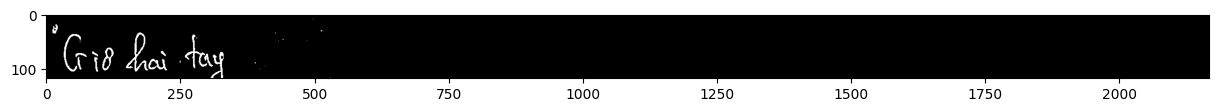

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,2))
plt.imshow(img[:,:,0], cmap="gray")
plt.show()

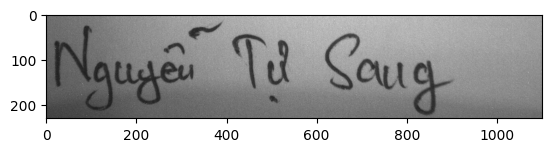

In [79]:
i = cv2.imread("E:\\Yumi\\data_30_11\\Image00016.JPG")
 #img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
plt.imshow(i[700:930,99:1200])
plt.show()

In [35]:
#img_ = np.array(img)
# predict outputs on validation images
NO_PREDICTS = 100
OFFSET=0
# prediction = act_model.predict(valid_img[OFFSET:OFFSET+NO_PREDICTS])
prediction = act_model.predict(valid_img[0:1])

In [36]:
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1], greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
  #  print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred) 
    i+=1

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
predicted text = Nguyễn Ngọc Mai


In [42]:
str(all_predictions[0])

'Nguyễn Ngọc Mai'